# 1. Importing Libraries 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from catboost import CatBoostRegressor

# 2. Loading Dataset

In [2]:
df = pd.read_csv('dataset/cirrhosis.csv')

# 3. Data Preprocessing 

## i)Handling Missing Values for Numeric Columns

In [4]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

## ii)Handling Missing Values for Categorical Columns 

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

## iii)Encoding Categorical Variables 

In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status'])

# 4. Data Splitting

In [7]:
X = df.drop('Stage', axis=1)
y = df['Stage']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 5. Feature Scaling 

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 6. EDA  

## i) Histogram for Numeric Variables

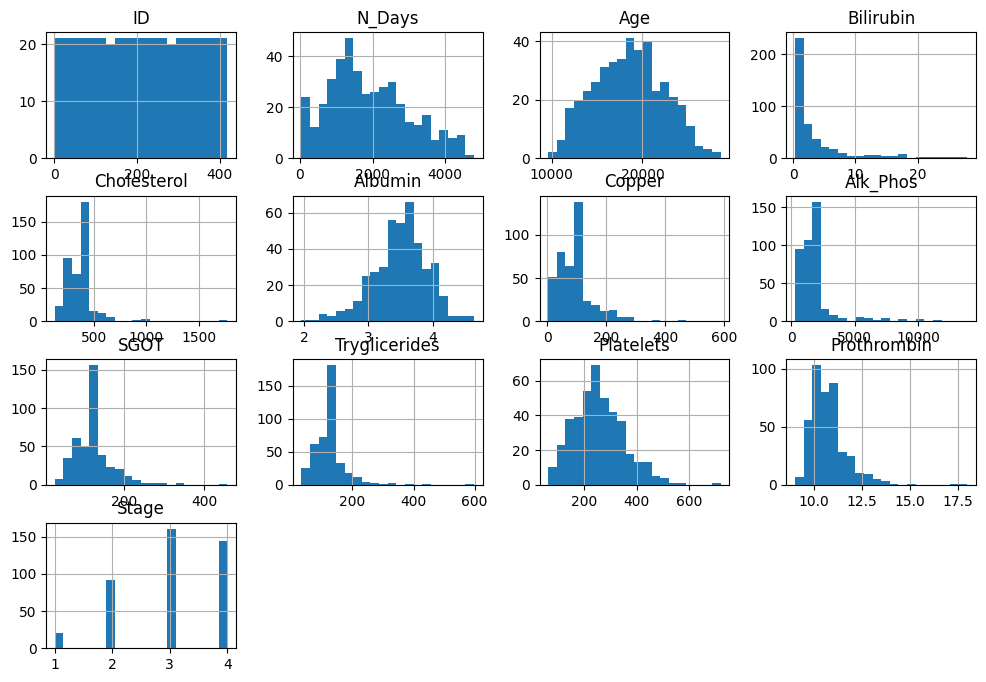

In [13]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

## ii)Boxplots for Numeric Variables 

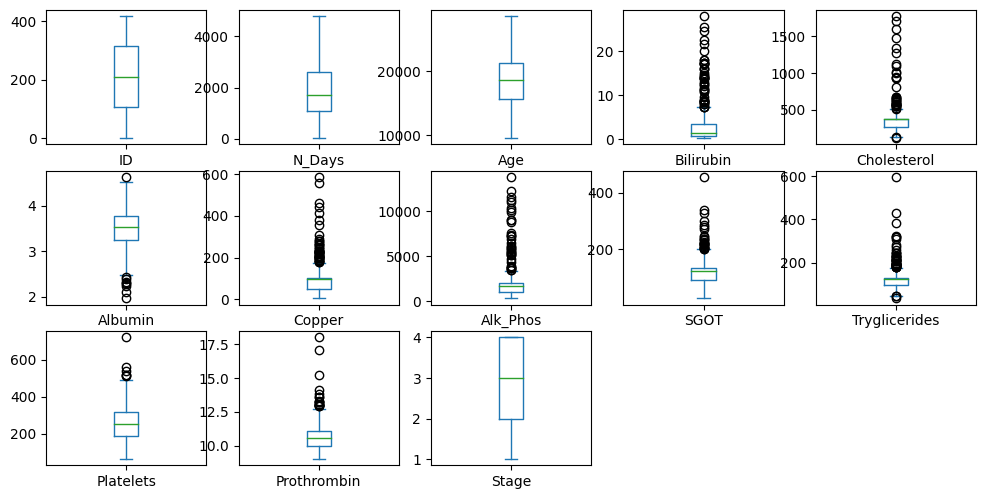

In [14]:
df.plot(kind='box', subplots=True, layout=(4, 5), sharex=False, sharey=False, figsize=(12, 8))
plt.show()

## iii)Count Plots for Categorical Variables 

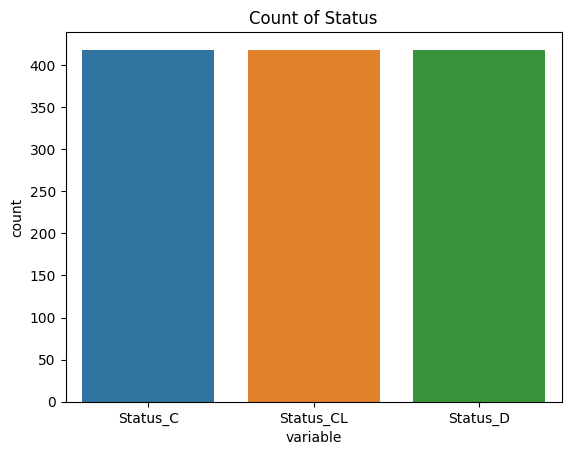

In [31]:
melted_df = df.melt(value_vars=['Status_C', 'Status_CL', 'Status_D'])
sns.countplot(data=melted_df, x='variable')
plt.title("Count of Status")
plt.show()

# 7. Correlation Analysis

In [20]:
correlation_matrix = df.corr()

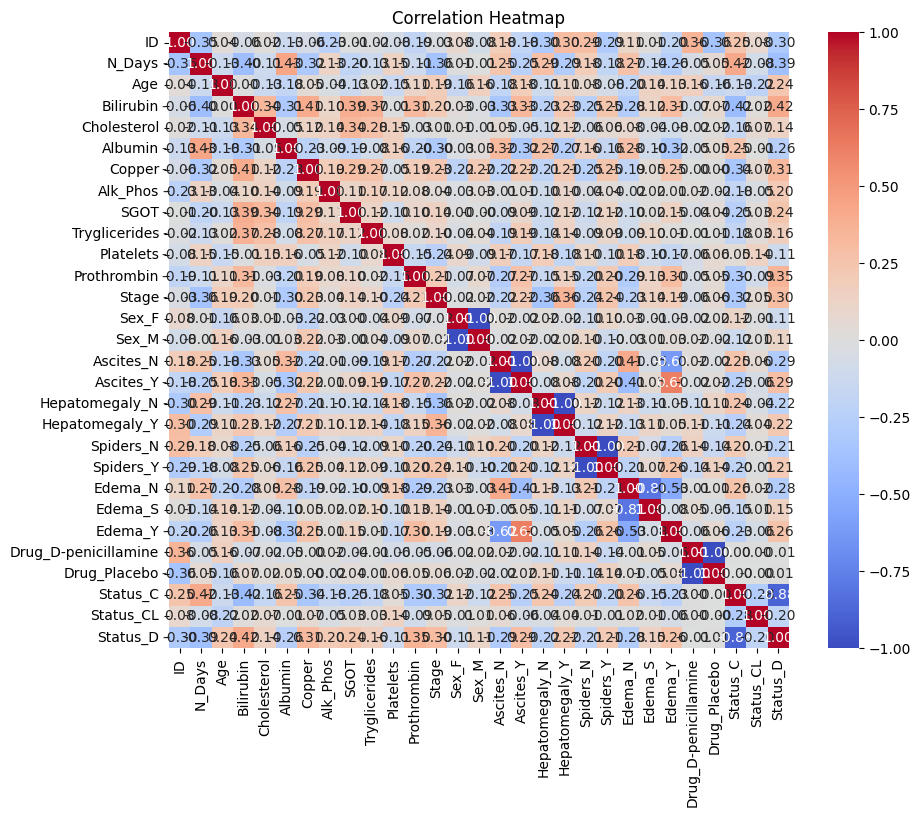

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 8. Target Variable Distribution 

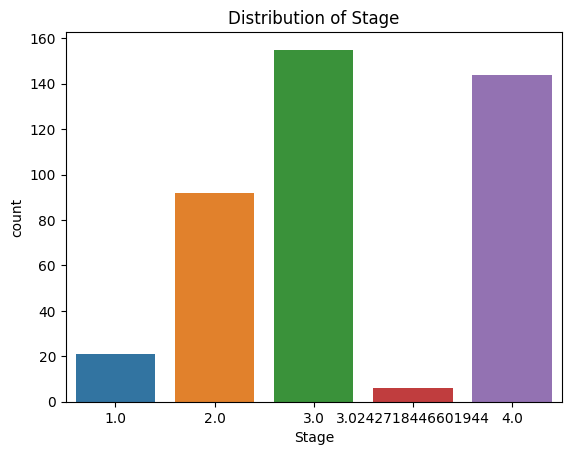

In [29]:
sns.countplot(data=df, x='Stage')
plt.title("Distribution of Stage")
plt.show()

# 9. Feature Relationships 

## i)Scatter Plots for Numeric Features 

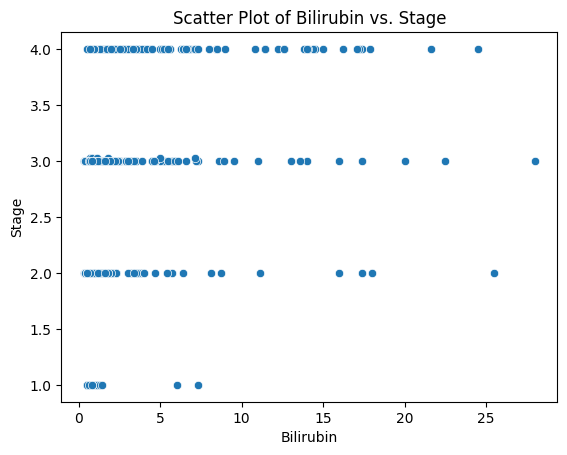

In [32]:
sns.scatterplot(data=df, x='Bilirubin', y='Stage')
plt.title("Scatter Plot of Bilirubin vs. Stage")
plt.show()

## ii) Categorical Feature Analysis 

In [36]:
contingency_table = pd.crosstab(index=df['Sex_M'], columns=df['Stage'])

# You can add margins to get row and column totals (marginal frequencies):
contingency_table_with_margins = pd.crosstab(index=df['Sex_M'], columns=df['Stage'], margins=True)

# To visualize the contingency table:
print(contingency_table)
print("\nContingency Table with Margins:")
print(contingency_table_with_margins)

Stage  1.000000  2.000000  3.000000  3.024272  4.000000
Sex_M                                                  
False        18        84       139         6       127
True          3         8        16         0        17

Contingency Table with Margins:
Stage  1.0  2.0  3.0  3.0242718446601944  4.0  All
Sex_M                                             
False   18   84  139                   6  127  374
True     3    8   16                   0   17   44
All     21   92  155                   6  144  418


In [37]:
contingency_table = pd.crosstab(index=df['Sex_F'], columns=df['Stage'])

# You can add margins to get row and column totals (marginal frequencies):
contingency_table_with_margins = pd.crosstab(index=df['Sex_F'], columns=df['Stage'], margins=True)

# To visualize the contingency table:
print(contingency_table)
print("\nContingency Table with Margins:")
print(contingency_table_with_margins)

Stage  1.000000  2.000000  3.000000  3.024272  4.000000
Sex_F                                                  
False         3         8        16         0        17
True         18        84       139         6       127

Contingency Table with Margins:
Stage  1.0  2.0  3.0  3.0242718446601944  4.0  All
Sex_F                                             
False    3    8   16                   0   17   44
True    18   84  139                   6  127  374
All     21   92  155                   6  144  418


# 10. Outlier Detection 

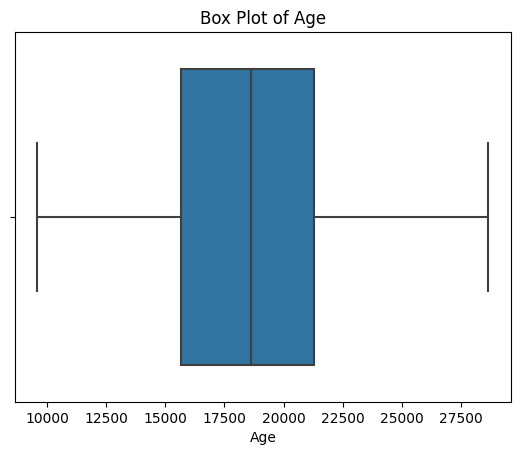

In [38]:
# Box plot for 'Age' column
sns.boxplot(data=df, x='Age')
plt.title("Box Plot of Age")
plt.show()

# 11. Feature Engineering 

In [39]:
# Feature engineering: Calculate BMI based on 'Age' and 'Cholesterol'
df['BMI'] = df['Cholesterol'] / (df['Age']**2)

In [35]:
df.columns

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N',
       'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S',
       'Edema_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Status_C',
       'Status_CL', 'Status_D'],
      dtype='object')

# Building Model using CatBoost Algorithm 

In [43]:
# Create and train the CatBoost model
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6)
catboost_model.fit(X_train, y_train, verbose=200)  # verbose to see the progress

# Make predictions on the validation set
catboost_valid_preds = catboost_model.predict(X_valid)

# Evaluate the model using mean squared error
catboost_mse = mean_squared_error(y_valid, catboost_valid_preds)
print(f'CatBoost MSE on Validation Set: {catboost_mse}')

0:	learn: 0.8578133	total: 149ms	remaining: 2m 29s
200:	learn: 0.1778153	total: 374ms	remaining: 1.48s
400:	learn: 0.0520774	total: 581ms	remaining: 867ms
600:	learn: 0.0198777	total: 782ms	remaining: 519ms
800:	learn: 0.0074588	total: 985ms	remaining: 245ms
999:	learn: 0.0029320	total: 1.19s	remaining: 0us
CatBoost MSE on Validation Set: 0.800272504591424


# Make Predictions 

In [44]:
# Make predictions on the test set
catboost_test_preds = catboost_model.predict(X_test)

In [45]:
# Calculate and print mean squared error
catboost_mse = mean_squared_error(y_test, catboost_test_preds)
print(f'CatBoost MSE on Test Set: {catboost_mse}')

CatBoost MSE on Test Set: 0.3974029816257983


# Predicted vs Actual Values 

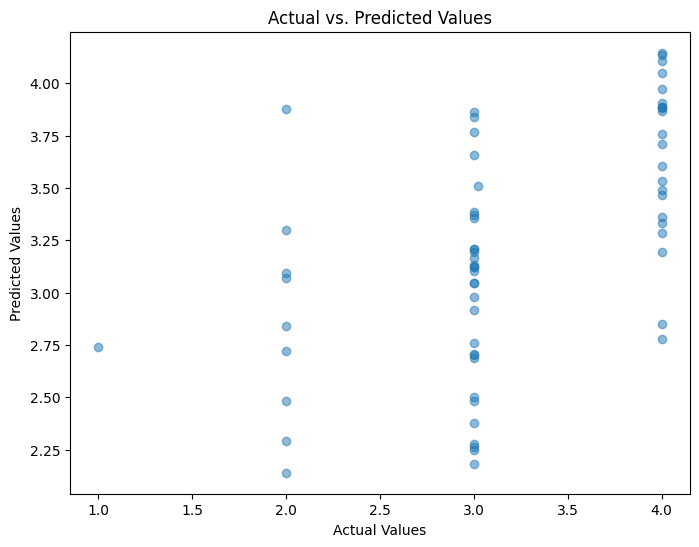

In [47]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, catboost_test_preds, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Overall MSE for Catboost Algorithm 

In [51]:
# Make predictions for all sets
train_preds = catboost_model.predict(X_train)
valid_preds = catboost_model.predict(X_valid)
test_preds = catboost_model.predict(X_test)

# Calculate the MSE for each set
train_mse = mean_squared_error(y_train, train_preds)
valid_mse = mean_squared_error(y_valid, valid_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Calculate the overall weighted MSE
total_samples = len(X_train) + len(X_valid) + len(X_test)
overall_mse = (len(X_train) / total_samples) * train_mse + (len(X_valid) / total_samples) * valid_mse + (len(X_test) / total_samples) * test_mse

print(f'Overall MSE: {overall_mse:.2f}')

Overall MSE: 0.18
